In [1]:
import numpy as np
import matplotlib.pyplot as plt

def geodesic_distance(x,y):
    dot_product = np.sum(x*y)
    mag_x = np.linalg.norm(x)
    mag_y = np.linalg.norm(y)
    cosine = dot_product/(mag_x*mag_y)
    if cosine>1: cosine = 1
    if cosine<-1: cosine = -1
    return np.arccos(cosine)

def log_map(x,y):
    d = geodesic_distance(x,y)
    temp = y - np.sum(x*y) * x
    if np.linalg.norm(temp) != 0:
        mapped_value = d * (temp/np.linalg.norm(temp))
    else:
        mapped_value = np.array([0.0,0.0,0.0])
    return mapped_value

def exp_map(p,v):
    mag_v = np.linalg.norm(v)
    if mag_v == 0:
        return p
    v_normalized = v/mag_v
    mapped_value = p * np.cos(mag_v) + v_normalized * np.sin(mag_v)
    return mapped_value

def parallel_transport(v,p,q):
    logmap1 = log_map(p,q)
    logmap2 = log_map(q,p)
    if np.linalg.norm(logmap1)!=0 and np.linalg.norm(logmap2)!=0:
        transported_value = v - (np.dot(logmap1 , v)/geodesic_distance(p,q)) * (logmap1+logmap2)
    else:
        transported_value = v
    return transported_value


In [2]:
#initialize dimension, pi and number of data points N
dim = 3
pi = 3.14
N = 20

# mean and covariance for noise generation
cov = np.eye(dim)
mean = np.zeros((dim))
noise = np.random.multivariate_normal(mean,cov*0.001,N)

#set the parameters p and v
p = np.array([1,0,0])
v = np.array([0,pi/4,0])

#define the independent variable x and create array of xiv
x = np.arange(-1,1,0.1)
v_array = np.dot(x.reshape(-1,1),v.reshape(1,-1))

#generate noise free data points y_temp and add noise to get noisy data y.
y_temp = np.array([exp_map(p,v_array[i]) for i in range(N)])
y = y_temp+noise

Iteration =  0
Iteration =  1
Iteration =  2
Iteration =  3
Iteration =  4
Iteration =  5
Iteration =  6
Iteration =  7
Iteration =  8
Iteration =  9
Iteration =  10
Iteration =  11
Iteration =  12
Iteration =  13
Iteration =  14
Iteration =  15
Iteration =  16
Iteration =  17
Iteration =  18
Iteration =  19
Iteration =  20
Iteration =  21
Iteration =  22
Iteration =  23
Iteration =  24
Iteration =  25
Iteration =  26
Iteration =  27
Iteration =  28
Iteration =  29
Iteration =  30
Iteration =  31
Iteration =  32
Iteration =  33
Iteration =  34
Iteration =  35
Iteration =  36
Iteration =  37
Iteration =  38
Iteration =  39
Iteration =  40
Iteration =  41
Iteration =  42
Iteration =  43
Iteration =  44
Iteration =  45
Iteration =  46
Iteration =  47
Iteration =  48
Iteration =  49
Iteration =  50
Iteration =  51
Iteration =  52
Iteration =  53
Iteration =  54
Iteration =  55
Iteration =  56
Iteration =  57
Iteration =  58
Iteration =  59
Iteration =  60
Iteration =  61
Iteration =  62
It

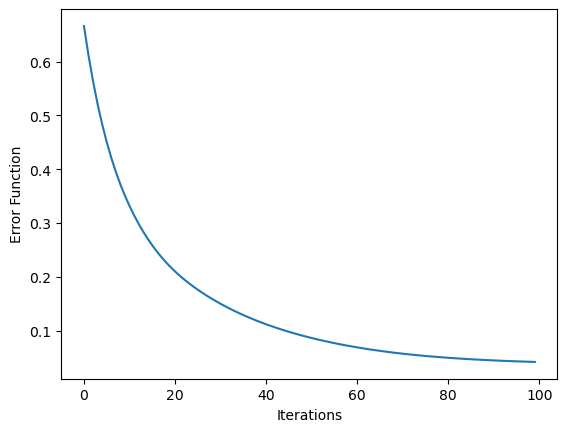

In [5]:
#compute gradients
def grad_p(p,v,y):
    grad = 0
    for i in range(N):
        mapped_value = exp_map(p,v*x[i])
        error_vec = log_map(mapped_value,y[i])
        error_vec_transported = parallel_transport(error_vec,mapped_value,p)
        grad += error_vec_transported
    return -1*grad/N

def grad_v(p,v,y):
    grad = 0
    for i in range(N):
        mapped_value = exp_map(p,v*x[i])
        error_vec = log_map(mapped_value,y[i])
        error_vec_transported = parallel_transport(error_vec,mapped_value,p)
        grad += error_vec_transported * x[i]
    return -1*grad/N
  
def compute_cost(X,Y):
    err = 0
    for i in range(N):
        err += geodesic_distance(X[i],Y[i])
    return err/N
  
#initializing params P and V to a value far from their actual value 
P = np.array([0.8,0.6,0])
V = np.array([0,0,0.3])

iterations = 100 #number of iterations
lr = 0.1 #learning rate
costs = np.array([])

for i in range(iterations):
    print ("Iteration = ", i)
    #parameter P update
    P_new = exp_map(P,-1*lr*grad_p(P,V,y))
    #print(grad_p(P,V,y))
    #parameter V update
    V_new = V - lr*grad_v(P,V,y)
    V = parallel_transport(V_new,P,P_new)
    P = P_new
    
    v_array = np.dot(x.reshape(-1,1),V.reshape(1,-1))
    model_output = np.array([exp_map(P,v_array[i]) for i in range(N)])
    costs = np.append(costs,compute_cost(y,model_output))

plt.plot(range(iterations),costs)
plt.ylabel("Error Function")
plt.xlabel("Iterations")
plt.show()

In [4]:
def accep_prob:
    

array([ 9.97806279e-01, -4.94045131e-03,  1.47787603e-04])